**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?


In [ ]:
# code generated using chat gpt

import pandas as pd

# Load the dataset
file_path = '/workspace/the_bootstrap/data/mammogram.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Cross-tabulation of treatment and breast_cancer_death
crosstab = pd.crosstab(data['treatment'], data['breast_cancer_death'])
print("Cross-tabulation:\n", crosstab)

# Calculate survival rates
control_survival_rate = crosstab.loc['control', 'no'] / crosstab.loc['control'].sum()
mammogram_survival_rate = crosstab.loc['mammogram', 'no'] / crosstab.loc['mammogram'].sum()

# Difference in survival rates
difference = mammogram_survival_rate - control_survival_rate

# Display results
print(f"Control group survival rate: {control_survival_rate:.4f}")
print(f"Mammogram group survival rate: {mammogram_survival_rate:.4f}")
print(f"Difference in survival rates: {difference:.4f}")


Cross-tabulation:
 breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
Control group survival rate: 0.9888
Mammogram group survival rate: 0.9889
Difference in survival rates: 0.0001



2. Bootstrap the densities and distributions of survival rates for the two groups. 


Observed Difference: 0.0001


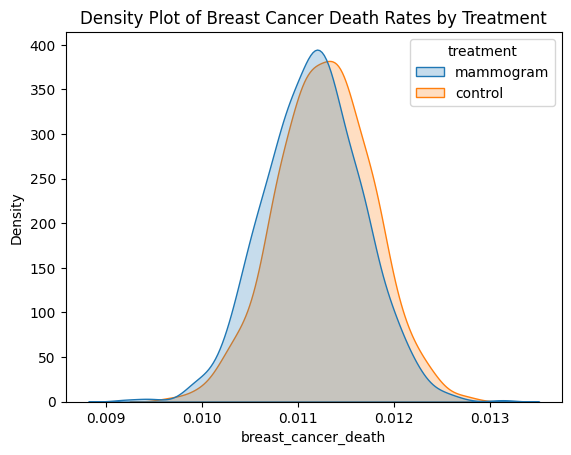

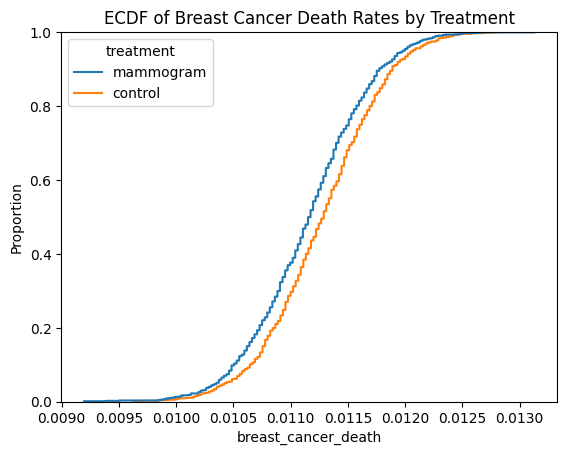

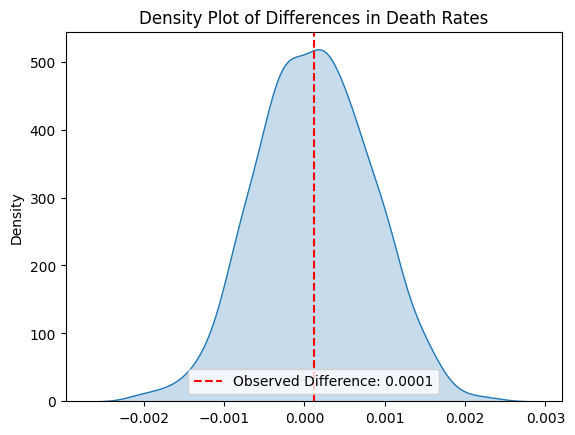

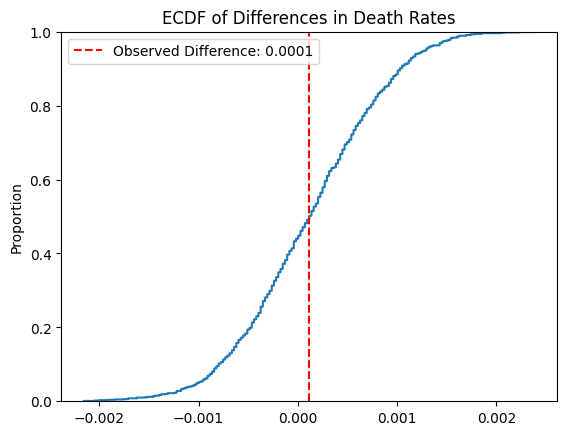

In [ ]:
# code generated with help from chat gpt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is loaded correctly
df = pd.read_csv("/workspace/the_bootstrap/data/mammogram.csv")

# Convert 'breast_cancer_death' to binary (1 for 'yes', 0 for 'no') if not already
df['breast_cancer_death'] = df['breast_cancer_death'].map({'yes': 1, 'no': 0})

# Full sample death averages and difference
mam_0 = df.loc[df['treatment'] == 'mammogram', 'breast_cancer_death'].mean()
control_0 = df.loc[df['treatment'] == 'control', 'breast_cancer_death'].mean()
diff_0 = control_0 - mam_0
print(f"Observed Difference: {diff_0:.4f}")

# Mammogram data
df_mam = df.loc[df['treatment'] == 'mammogram', 'breast_cancer_death']
N_mam = df_mam.shape[0]

# Control data
df_control = df.loc[df['treatment'] == 'control', 'breast_cancer_death']
N_control = df_control.shape[0]

# Simulation
S = 1000  # Number of bootstrap samples
rate_mam = np.zeros(S)
rate_control = np.zeros(S)
diff = np.zeros(S)

# Bootstrapping
for s in range(S):
    sample_mam = df_mam.sample(N_mam, replace=True)  # Resample mammogram group
    rate_mam[s] = sample_mam.mean()  # Mean death rate for mammogram group
    sample_control = df_control.sample(N_control, replace=True)  # Resample control group
    rate_control[s] = sample_control.mean()  # Mean death rate for control group
    diff[s] = rate_control[s] - rate_mam[s]  # Difference in rates

# Combine mammogram and control results into one dataframe for plotting
rdf_mam = pd.DataFrame({'treatment': 'mammogram', 'breast_cancer_death': rate_mam})
rdf_control = pd.DataFrame({'treatment': 'control', 'breast_cancer_death': rate_control})
rdf = pd.concat([rdf_mam, rdf_control], axis=0)

# Density plot of breast cancer death rates
sns.kdeplot(data=rdf, x='breast_cancer_death', hue='treatment', fill=True)
plt.title("Density Plot of Breast Cancer Death Rates by Treatment")
plt.show()

# ECDF of breast cancer death rates
sns.ecdfplot(data=rdf, x='breast_cancer_death', hue='treatment')
plt.title("ECDF of Breast Cancer Death Rates by Treatment")
plt.show()

# Density plot of differences in rates
ax = sns.kdeplot(diff, fill=True)
ax.axvline(x=diff_0, color='red', linestyle='--', label=f'Observed Difference: {diff_0:.4f}')
plt.title("Density Plot of Differences in Death Rates")
plt.legend()
plt.show()

# ECDF of differences in rates
ax = sns.ecdfplot(diff)
ax.axvline(x=diff_0, color='red', linestyle='--', label=f'Observed Difference: {diff_0:.4f}')
plt.title("ECDF of Differences in Death Rates")
plt.legend()
plt.show()


3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [ ]:
# code generated using chat gpt
# Construct the 99% confidence interval
lower_bound = np.percentile(diff, 0.5)  # 0.5th percentile
upper_bound = np.percentile(diff, 99.5)  # 99.5th percentile

# Display the results
print(f"99% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
print("Does the confidence interval include zero?", "Yes" if lower_bound <= 0 <= upper_bound else "No")


99% Confidence Interval: (-0.0018, 0.0019)
Does the confidence interval include zero? Yes



4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

If the sampling pool consists of a generic selection of women (indiscriminate of prior breast cancer diagnosis) then the death rates are likely similar because the mammogram only makes a difference if the patient actually has breast cancer. Additional data about the patients' gender, age, prior health conditions, and breast cancer diagosis status across the 25 years would be helpful.